In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
train = pd.read_csv(r'C:\Users\198353\Downloads\Twitter Sentiment Analysis\train.csv')
test = pd.read_csv(r'C:\Users\198353\Downloads\Twitter Sentiment Analysis\test_tweets.csv')
train.head(3)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [37]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

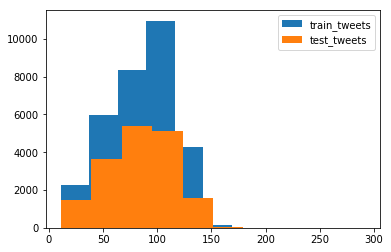

In [38]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, label="train_tweets")
plt.hist(length_test, label="test_tweets")
plt.legend()

In [39]:
#total = pd.concat([train,test],ignore_index = True )
total = train.append(test,ignore_index = True)
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
id       49159 non-null int64
label    31962 non-null float64
tweet    49159 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


C:\Users\198353\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [40]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [41]:
import re
def process_tweet(tweet):
    return ( " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet ).split()))


In [42]:
total['processed_tweets'] = total['tweet'].apply(process_tweet)

In [43]:
total.head(10)

,id,label,tweet,processed_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so gr8


In [44]:
total.drop(['id','tweet'], axis =1,inplace = True)
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 2 columns):
label               31962 non-null float64
processed_tweets    49159 non-null object
dtypes: float64(1), object(1)
memory usage: 768.2+ KB


In [45]:
all_words = ' '.join([text for text in total.processed_tweets])

In [46]:
from wordcloud import WordCloud
wordcloud = WordCloud (width = 800, height = 800, background_color ='white', max_font_size = 110).generate(all_words)

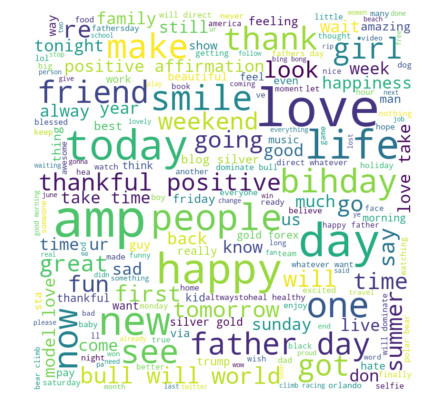

In [47]:
plt.figure(figsize=(10, 7))
plt.imshow (wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

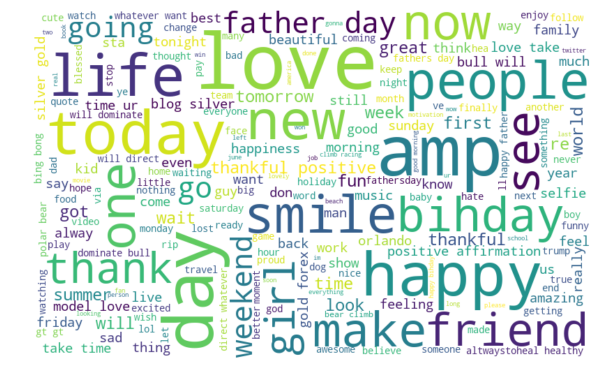

In [48]:
normal_words =' '.join([text for text in total['processed_tweets'][total['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, background_color ='white', max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

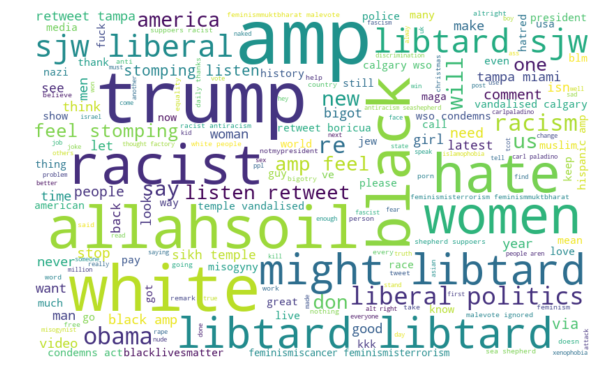

In [49]:
negative_words = ' '.join([text for text in total['processed_tweets'][total['label'] == 1]])

wordcloud = WordCloud(width=800, height=500,background_color ='white', max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [50]:
train = total[total['label'].notnull()]

In [51]:
train.shape
train_label = train['label']
test = total[total['label'].isnull()]
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 0 to 31961
Data columns (total 2 columns):
label               31962 non-null float64
processed_tweets    31962 non-null object
dtypes: float64(1), object(1)
memory usage: 749.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17197 entries, 31962 to 49158
Data columns (total 2 columns):
label               0 non-null float64
processed_tweets    17197 non-null object
dtypes: float64(1), object(1)
memory usage: 403.1+ KB


In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer  

In [53]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=1, max_features=1000, stop_words='english')

In [54]:
bow = bow_vectorizer.fit_transform(train['processed_tweets'])
bow_test = bow_vectorizer.fit_transform(test['processed_tweets'])
bow.shape

(31962, 1000)

In [55]:
tfidf_vectorizer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [56]:
tfidf_train = tfidf_vectorizer.fit_transform(bow)
tfidf_test = tfidf_vectorizer.fit_transform(bow_test)
tfidf.shape

(31962, 1000)

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier (n_estimators=200)
model.fit(tfidf_train,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
prediction = model.predict(tfidf_test)

In [63]:
test_data = pd.read_csv(r'C:\Users\198353\Downloads\Twitter Sentiment Analysis\test_tweets.csv')
final_result = pd.DataFrame({'id':test_data['id'],'label':prediction})
final_result.to_csv(r'C:\Users\198353\Downloads\Twitter Sentiment Analysis\output.csv',index=False)